# Notebook to look at Nobel prize winners

In [1]:
#standard imports
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print('Setup Complete')

Setup Complete


In [5]:
#read in data and print first rows
df = pd.read_csv('nobel_final.csv')
df.head()

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


In [6]:
age_df = df[['gender', 'year', 'age_get_prize']]

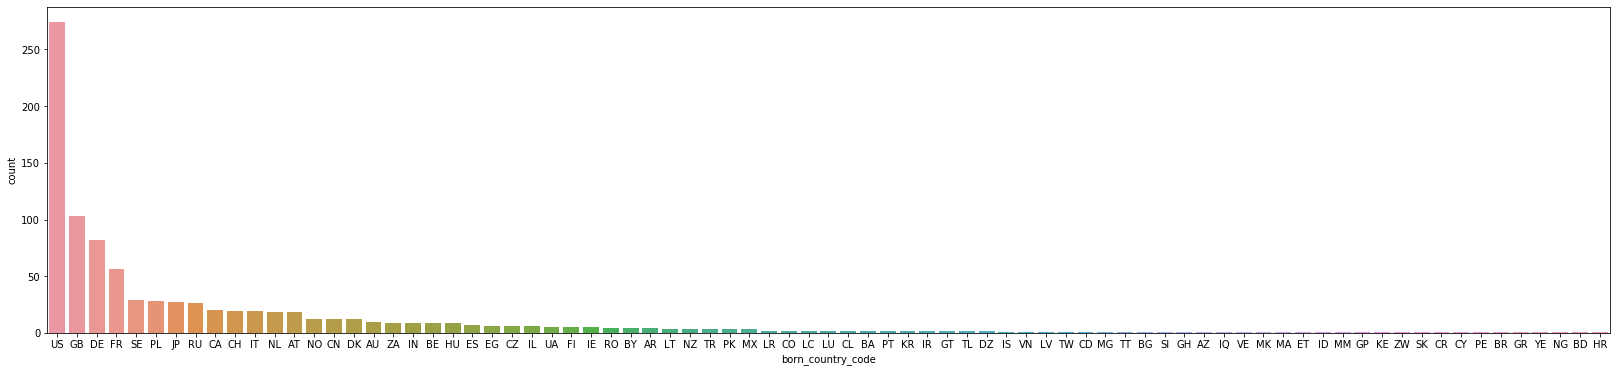

In [25]:
plt.figure(figsize=(28,6))
sns.countplot(x ='born_country_code', data = df, order = df['born_country_code'].value_counts().index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

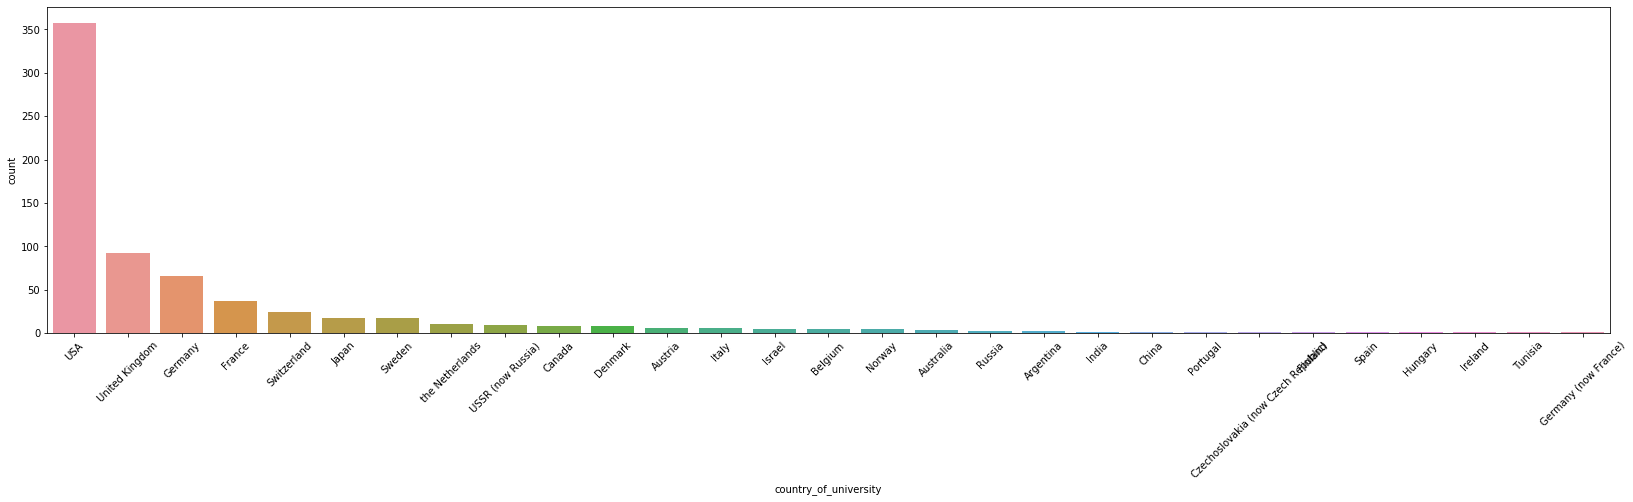

In [27]:
plt.figure(figsize=(28,6))
sns.countplot(x ='country_of_university', data = df, order = df['country_of_university'].value_counts().index)
plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(28,6))
sns.countplot(x ='country_of_university', data = df, order = df['country_of_university'].value_counts().index)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text xticklabel objects>)

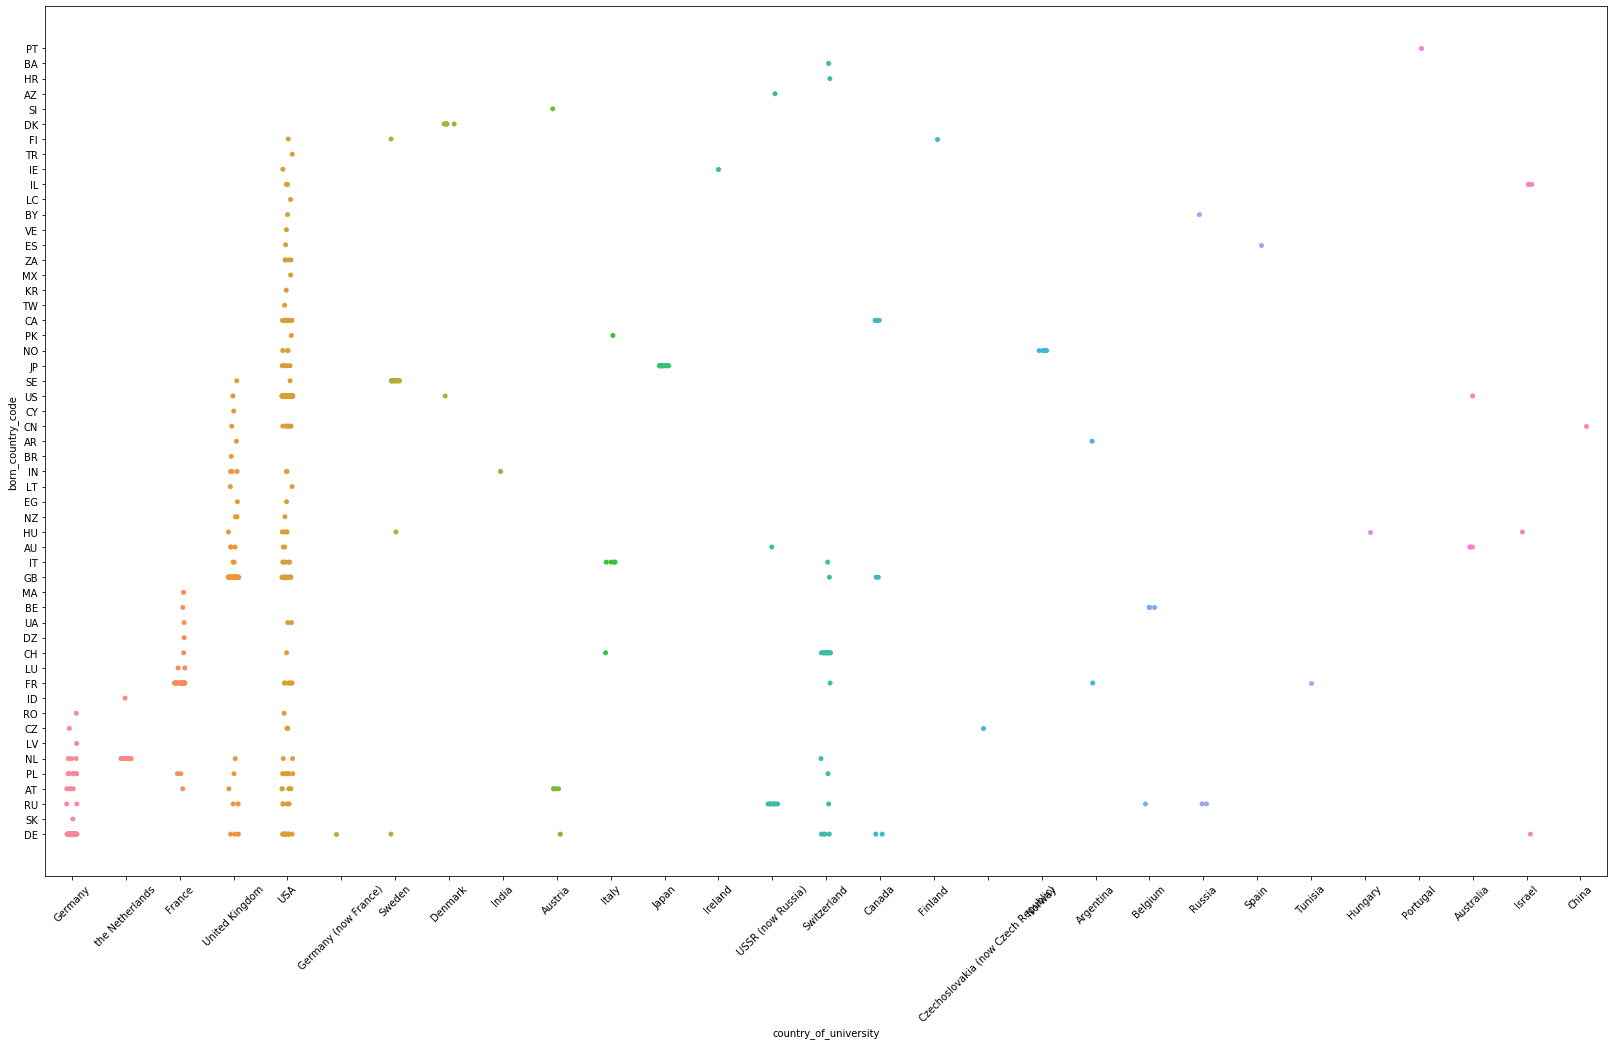

In [33]:
plt.figure(figsize=(28,16))
sns.stripplot(x=df['country_of_university'], y=df['born_country_code'])
plt.xticks(rotation=45)